In [2]:
import pandas as pd

# Challenge 1

In [3]:
#Deleting spaces in txt files. Because there were spaces at the end of lines.

In [4]:
with open('Saturday, October 02, 2021.txt', 'r') as f:
    txt = f.read().replace(' ', '')

with open('Saturday, October 02, 2021.txt', 'w') as f:
    f.write(txt)

In [5]:
with open('Saturday, October 09, 2021.txt', 'r') as f:
    txt = f.read().replace(' ', '')

with open('Saturday, October 09, 2021.txt', 'w') as f:
    f.write(txt)

In [6]:
#Reading txt files and converting to csv files

In [7]:
read_file = pd.read_csv(r'Saturday, October 09, 2021.txt')
read_file.to_csv (r'Saturday, October 09, 2021.csv', index=None)

In [8]:
read_file = pd.read_csv(r'Saturday, October 02, 2021.txt')
read_file.to_csv (r'Saturday, October 02, 2021.csv', index=None)

In [9]:
import glob

In [10]:
df = pd.concat(map(pd.read_csv, glob.glob('Saturday, October*.csv')))
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082
1,A002,R051,02-00-00,59ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083
2,A002,R051,02-00-00,59ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107
3,A002,R051,02-00-00,59ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156
4,A002,R051,02-00-00,59ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188


In [11]:
df.size

4619758

In [12]:
df.info

<bound method DataFrame.info of           C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0        A002  R051  02-00-00           59ST  NQR456W      BMT  09/25/2021   
1        A002  R051  02-00-00           59ST  NQR456W      BMT  09/25/2021   
2        A002  R051  02-00-00           59ST  NQR456W      BMT  09/25/2021   
3        A002  R051  02-00-00           59ST  NQR456W      BMT  09/25/2021   
4        A002  R051  02-00-00           59ST  NQR456W      BMT  09/25/2021   
...       ...   ...       ...            ...      ...      ...         ...   
209762  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  10/08/2021   
209763  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  10/08/2021   
209764  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  10/08/2021   
209765  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  10/08/2021   
209766  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  10/08/2021   

            TIME     DESC  ENTR

# Challenge 2

In [13]:
df['DateAndTime'] = df['DATE'].str.cat(df['TIME'],sep=" ")
df["DATE_TIME"] = pd.to_datetime(df['DateAndTime'], format="%m/%d/%Y %H:%M:%S")
df = df.drop('DateAndTime', 1)

In [14]:
##Added date_time column and saved concatanated file
df.to_csv('concatanated.csv', index=False)

# Challenge 3

In [15]:
def get_hour(t):
   h, m, s = map(int, t.split(':'))
   return h 

In [16]:
# Firstly we need to find n for every n hour problem
## We can take first and second row for measuring n
first_rows_time = df.iloc[0]['TIME']
first_rows_hour = get_hour(first_rows_time)

second_rows_time = df.iloc[1]['TIME']
second_rows_hour = get_hour(second_rows_time)

print('n is equals to',second_rows_hour-first_rows_hour)


n is equals to 4


In [17]:
#So we have four hour time perioads
#Let's find daily entries now
daily_entries = df.groupby(pd.Grouper(key='DATE_TIME', axis=0, 
                      freq='D', sort=True)).sum()

#print(type(daily_entries))
##So we have dataframe again.

val= daily_entries['ENTRIES'].sum()  
print('TOTAL ENTRIES COUNT OF OUR DATA = ',val)

TOTAL ENTRIES COUNT OF OUR DATA =  17458472587478


In [18]:
daily_entries_foreach_turnstile = df.groupby(['UNIT', 'DATE']).sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(daily_entries_foreach_turnstile)



                     ENTRIES        EXITS
UNIT DATE                                
R001 09/25/2021   2685714610    575646521
     09/26/2021   2685761234    575707039
     09/27/2021   2685816015    575767254
     09/28/2021   2685227141    575703521
     09/29/2021   2685948574    575900673
     09/30/2021   2686017646    575969837
     10/01/2021   2686086396    576038669
     10/02/2021   2686141737    576100763
     10/03/2021   2686184566    576154141
     10/04/2021   2686236322    576207684
     10/05/2021   2686564987    576143213
     10/06/2021   2687158908    575950145
     10/07/2021   2687229404    576020672
     10/08/2021   2687300672    576092159
R003 09/25/2021     46543786     28154315
     09/26/2021     46546126     28156882
     09/27/2021     46550066     28159969
     09/28/2021     46555637     28164780
     09/29/2021     46561318     28169668
     09/30/2021     46567355     28174636
     10/01/2021     46573204     28179288
     10/02/2021     46577082     2

# Challenge 4

                ENTRIES       EXITS
DATE                               
09/25/2021  10317811379  9093813359
09/26/2021  10317839406  9093886081
09/27/2021  10317863876  9093949824
09/28/2021  10317898620  9094021044
09/29/2021  10317934840  9094096305
09/30/2021  10317972312  9094174598
10/01/2021  10318011028  9094253800
10/02/2021  10318045971  9094328800
10/03/2021  10318068829  9094389004
10/04/2021  10318090266  9094445612
10/05/2021  10318124395  9094518406
10/06/2021  10318162332  9094597010
10/07/2021  10318199902  9094675993
10/08/2021  10318237403  9094755988


Text(0.5, 1.0, 'Daily Entries for Unit R163')

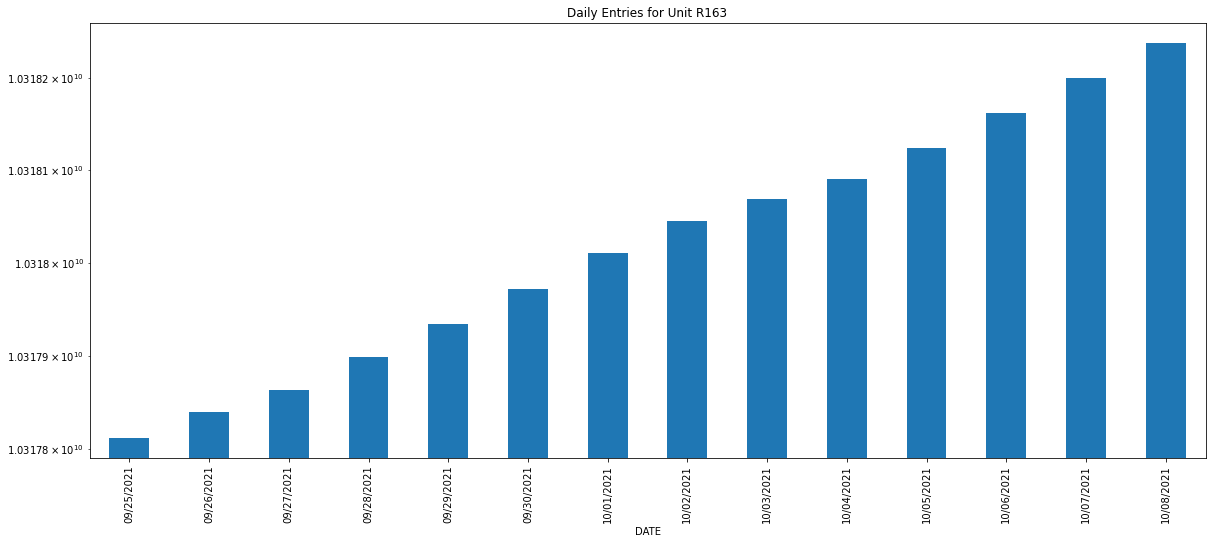

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
df['UNIT'] = df['UNIT'].astype(str)
unit_163 = df[df['UNIT'] == 'R163']
grouped = unit_163.groupby('DATE').sum()

#As you can see our plot is same with our data
print(grouped)
plt.figure(figsize=(20,8))
grouped['ENTRIES'].plot(kind='bar')
plt.yscale('log')
plt.title('Daily Entries for Unit R163')

# Challange 5

In [64]:
df.groupby(['C/A','UNIT','STATION','DATE']).sum()

ENTRIES      EXITS
C/A   UNIT STATION       DATE                            
A002  R051 59ST          09/25/2021  323479964  152385762
                         09/26/2021  323499656  152399880
                         09/27/2021  323519684  152419513
                         09/28/2021  323553022  152447541
                         09/29/2021  323587803  152476396
...                                        ...        ...
TRAM2 R469 RIT-ROOSEVELT 10/04/2021   52476738    3049342
                         10/05/2021   52487296    3049699
                         10/06/2021   52499786    3050050
                         10/07/2021   52512298    3050362
                         10/08/2021   52526429    3050634

[10512 rows x 2 columns]

# Challange 6

In [69]:
df.groupby(['STATION','DATE']).value_counts('STATION')

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'